In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
horizon_data = pd.read_csv(r'C:\Users\visan\Desktop\data correction\200922KK.NO2_Vis_sync.csv',usecols=[1,6,13,15,19], sep ='\s+',  header = 63)
#print('size of horizon_data[rows, columns] = ', horizon_data.shape)

In [59]:
horizon_data.head()

,time,viewing-azimuth-angle,a[NO2],a[O4],a[H2O]
0,5.449561,130.0,1.451263e+17,9020.212,3.945301e+23
1,5.459367,140.0,1.417867e+17,8425.414,3.882498e+23
2,5.469175,150.0,1.348820e+17,8091.209,3.875746e+23
3,5.478989,160.0,1.614497e+17,7874.808,3.820169e+23
4,5.488800,170.0,2.359207e+17,7908.630,3.889622e+23


In [60]:
VAA = horizon_data['viewing-azimuth-angle']

In [61]:
# Create copy of the slant columns
H2O_corr = horizon_data['a[H2O]'].copy();
O4_corr = horizon_data['a[O4]'].copy();
NO2_corr = horizon_data['a[NO2]'].copy();
# run loop over all rows in horizon_data
for i in range (0,horizon_data.shape[0]):#loop through rows of horizon_data
    if(VAA[i] == 130):
        norm_value=horizon_data['a[H2O]'][i]; #store value of H2O corresponding to 130 degree or 1st azimuthal value of each individual scan
    
    H2O_corr[i]=horizon_data['a[H2O]'][i] / norm_value;  # Normalise H2O
    NO2_corr[i]=horizon_data['a[NO2]'][i] / H2O_corr[i]; # NO2 / Normalised H2O
    O4_corr[i]=horizon_data['a[O4]'][i]   / H2O_corr[i]; # O4 / Normalised H2O
    

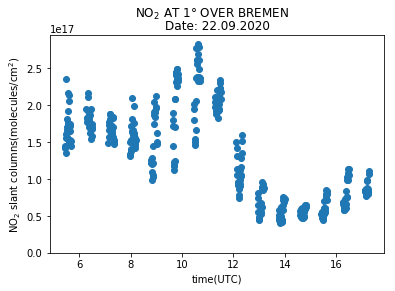

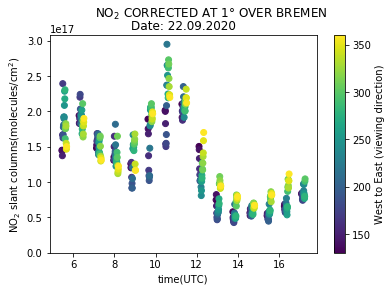

In [68]:
plt.scatter(horizon_data.time,horizon_data['a[NO2]'])
plt.ylim(bottom=0)
plt.suptitle('NO$_2$ AT 1° OVER BREMEN')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('NO$_2$ slant columns(molecules/cm$^2$)')
plt.show()

plt.scatter(horizon_data.time,NO2_corr, c= VAA)
plt.ylim(bottom=0)
plt.suptitle('NO$_2$ CORRECTED AT 1° OVER BREMEN')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('NO$_2$ slant columns(molecules/cm$^2$)')
cbar = plt.colorbar()
cbar.set_label('West to East (viewing direction)')
plt.show()

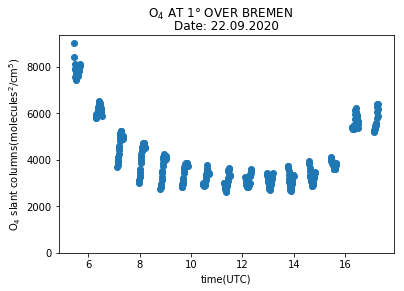

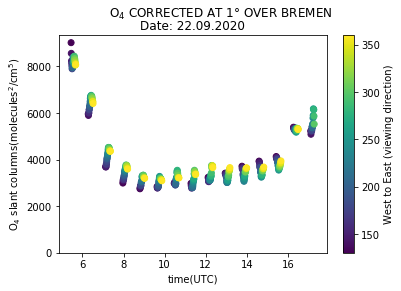

In [50]:
plt.scatter(horizon_data.time,horizon_data['a[O4]'])
plt.ylim(bottom=0)
plt.suptitle('O$_4$ AT 1° OVER BREMEN')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('O$_4$ slant columns(molecules$^2$/cm$^5$)')
plt.show()

plt.scatter(horizon_data.time,O4_corr,c = VAA)
plt.ylim(bottom=0)
plt.suptitle('O$_4$ CORRECTED AT 1° OVER BREMEN')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('O$_4$ slant columns(molecules$^2$/cm$^5$)')
cbar = plt.colorbar()
cbar.set_label('West to East (viewing direction)')
plt.show()